In [1]:
%matplotlib inline
import glob
import ruamel.yaml
import numpy as np
import matplotlib.pyplot as plt
from typing import Union, Dict

from commonroad.common.file_reader import CommonRoadFileReader
from commonroad.scenario.scenario import ScenarioID
from commonroad.visualization.draw_dispatch_cr import draw_object

In [2]:
def load_yaml(file_name: str) -> Union[Dict, None]:
    """
    Loads configuration setup from a yaml file

    :param file_name: name of the yaml file
    """
    with open(file_name, 'r') as stream:
        try:
            config = ruamel.yaml.round_trip_load(stream, preserve_quotes=True)
            return config
        except ruamel.yaml.YAMLError as exc:
            print(exc)
            return None

In [3]:
interaction_config = load_yaml("/data/dataset-converters_tum_cps/dataset-converters/src/INTERACTION/config.yaml")

In [4]:
files = glob.glob("/data/dataset-converters_tum_cps/dataset-converters/src/INTERACTION/repaired_maps/translated/*.xml")

In [5]:
for file in files:
    print(file)
    plt.figure(figsize=(20, 20))
    scenario, pp_set = CommonRoadFileReader(file).open()
    draw_object(scenario.lanelet_network.find_lanelet_by_id(112), draw_params={"lanelet": {"show_label": True}})
#     for lanelet in scenario.lanelet_network.lanelets:
#         print(lanelet.lanelet_id)
#         draw_object(lanelet, draw_params={"lanelet": {"show_label": True}})
#     draw_object(pp_set)
#     plt.gca().set_aspect("equal")
    plt.show()

/data/dataset-converters_tum_cps/dataset-converters/src/INTERACTION/repaired_maps/translated/DEU_Merging_MT_repaired.xml


ValueError: Image size of 69490x2142 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1440x1440 with 1 Axes>

/data/dataset-converters_tum_cps/dataset-converters/src/INTERACTION/repaired_maps/translated/USA_Intersection_GL_repaired.xml


TypeError: must be str, not NoneType

<Figure size 1440x1440 with 0 Axes>

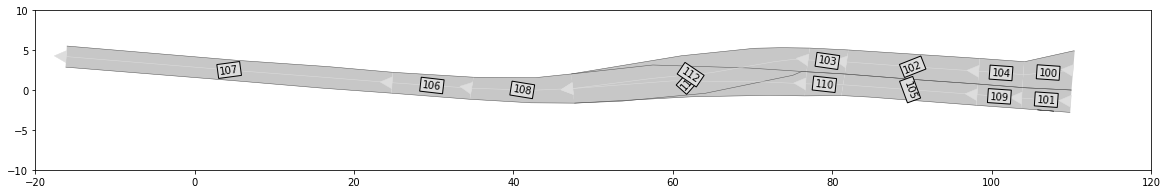

In [4]:
file = "/data/dataset-converters_tum_cps/dataset-converters/src/INTERACTION/repaired_maps/translated/DEU_Merging_MT_repaired.xml"
scenario, pp_set = CommonRoadFileReader(file).open()
plt.figure(figsize=(20, 10))
draw_object(pp_set)
draw_object(scenario.lanelet_network, draw_params={"lanelet": {"show_label": True}}, plot_limits=[-20, 120, -10, 10])
plt.gca().set_aspect("equal")
plt.show()

In [ ]:
# DEU_Merging_MT_repaired | 102,106,110,103,107,111,108,104,112

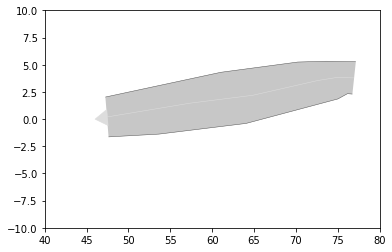

In [201]:
draw_object(scenario.lanelet_network.find_lanelet_by_id(112), plot_limits=[40, 80, -10, 10])
draw_object(pp_set)

In [202]:
for lanelet in scenario.lanelet_network.lanelets:
    print(f"id={lanelet.lanelet_id}, predecessor={lanelet.predecessor}, successor={lanelet.successor}, adj_left={lanelet.adj_left}, adj_right={lanelet.adj_right}")

id=100, predecessor=[], successor=[], adj_left=101, adj_right=None
id=102, predecessor=[103], successor=[104], adj_left=105, adj_right=None
id=106, predecessor=[107], successor=[108], adj_left=None, adj_right=None
id=101, predecessor=[], successor=[109], adj_left=None, adj_right=100
id=110, predecessor=[111], successor=[], adj_left=None, adj_right=103
id=109, predecessor=[101], successor=[105], adj_left=None, adj_right=104
id=105, predecessor=[109], successor=[], adj_left=None, adj_right=102
id=103, predecessor=[112], successor=[102], adj_left=110, adj_right=None
id=107, predecessor=[], successor=[106], adj_left=None, adj_right=None
id=111, predecessor=[108], successor=[110], adj_left=None, adj_right=112
id=108, predecessor=[106], successor=[111, 112], adj_left=None, adj_right=None
id=104, predecessor=[102], successor=[], adj_left=109, adj_right=None
id=112, predecessor=[108], successor=[103], adj_left=111, adj_right=None


In [213]:
plt.figure()
file = "/data/dataset-converters_tum_cps/dataset-converters/src/INTERACTION/repaired_maps/translated/USA_Intersection_GL_repaired.xml"
scenario, pp_set = CommonRoadFileReader(file).open()
draw_object(scenario.lanelet_network, draw_params={"lanelet": {"show_label": True}})
draw_object(pp_set)
plt.gca().set_aspect("equal")
plt.show()

TypeError: must be str, not NoneType

<Figure size 432x288 with 0 Axes>

In [171]:
scenario.lanelet_network.find_lanelet_by_id(105).successor

[]

/data/dataset-converters_tum_cps/dataset-converters/src/INTERACTION/repaired_maps/translated/DEU_Merging_MT_repaired.xml


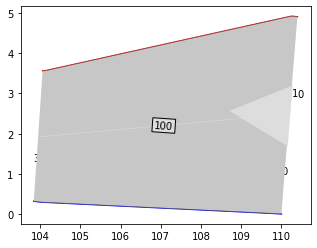

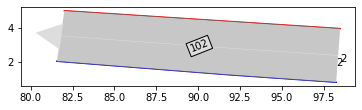

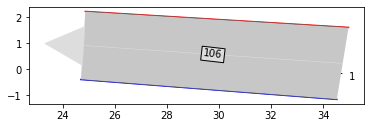

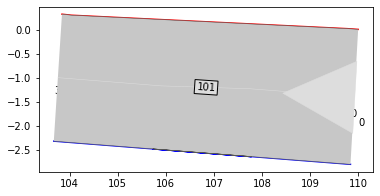

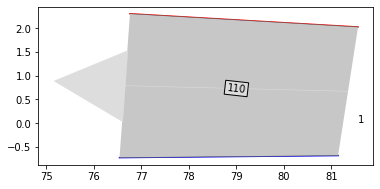

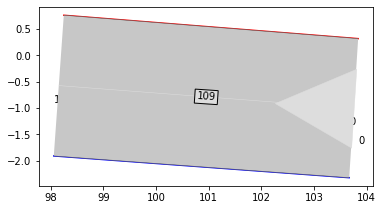

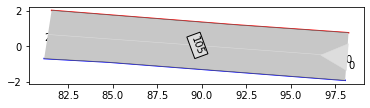

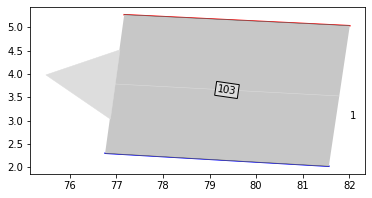

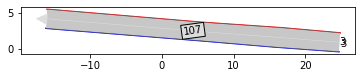

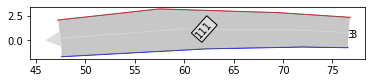

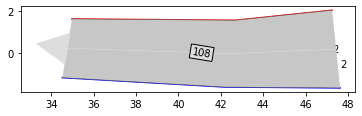

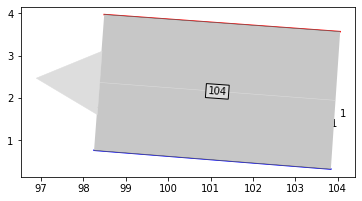

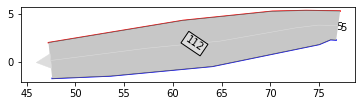

/data/dataset-converters_tum_cps/dataset-converters/src/INTERACTION/repaired_maps/translated/DEU_Roundabout_OF_repaired.xml


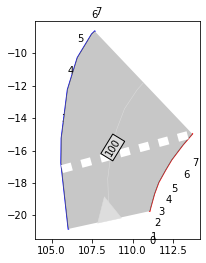

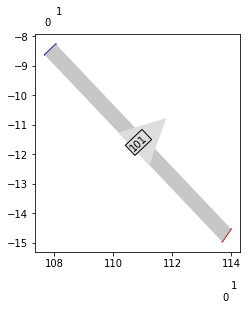

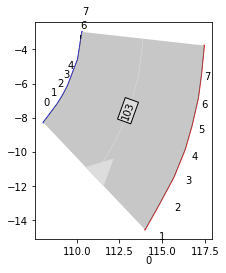

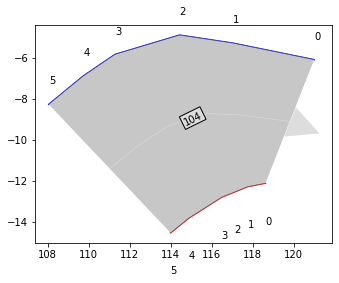

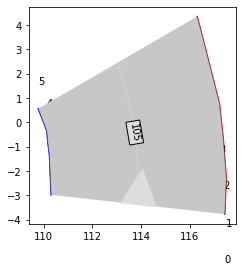

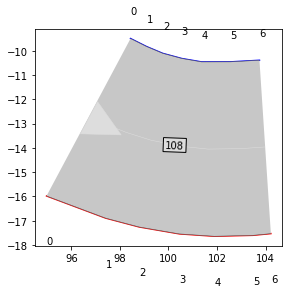

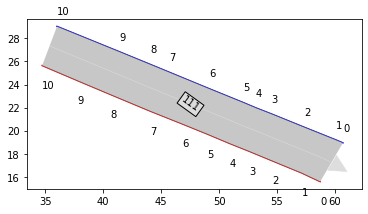

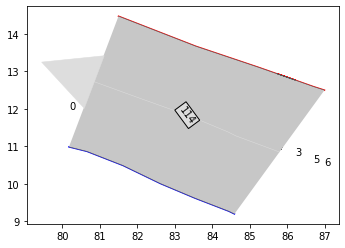

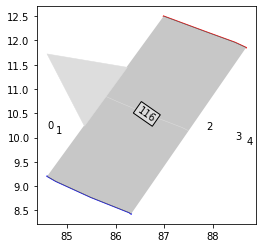

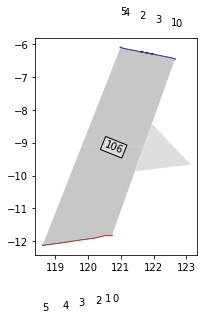

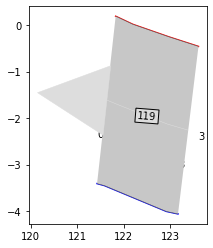

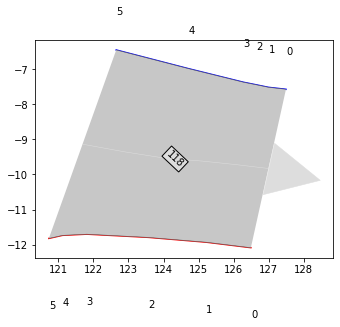

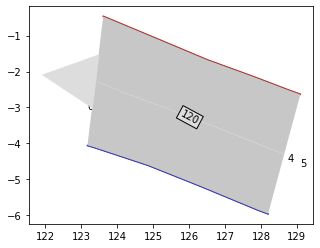

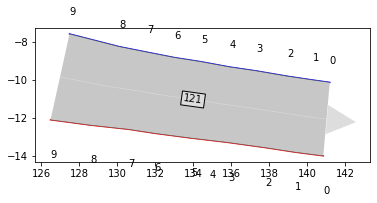

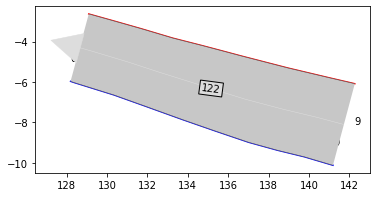

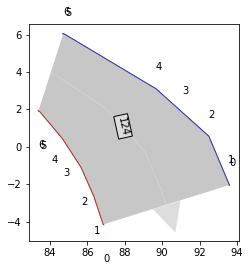

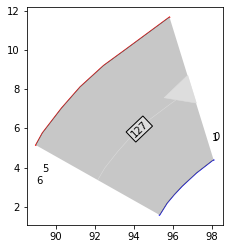

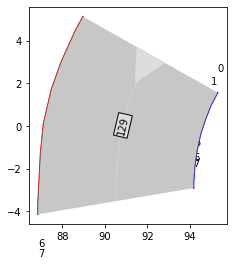

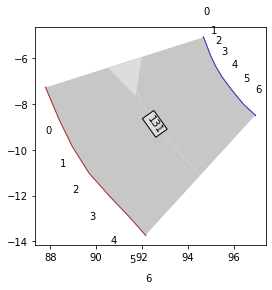

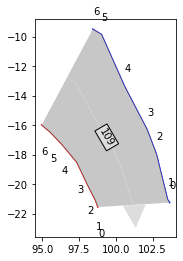

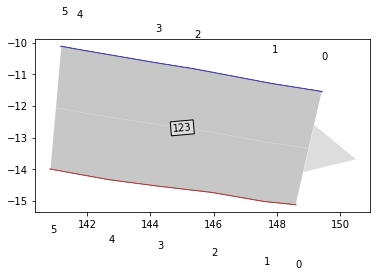

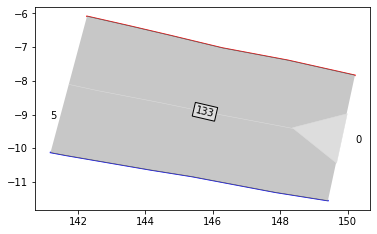

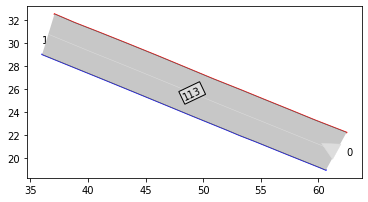

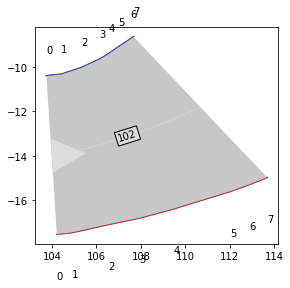

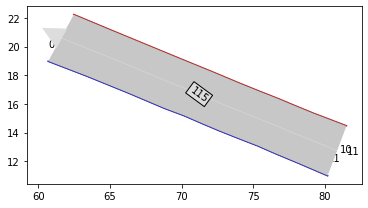

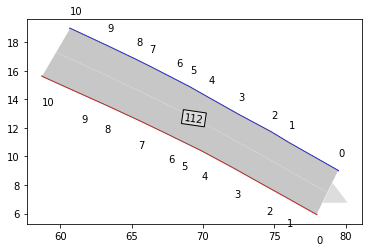

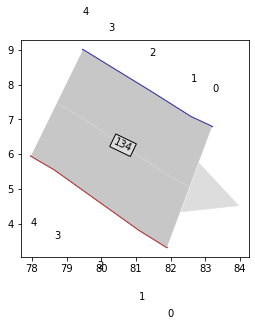

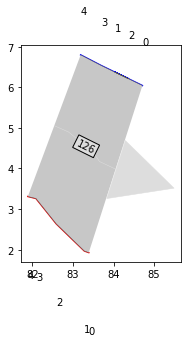

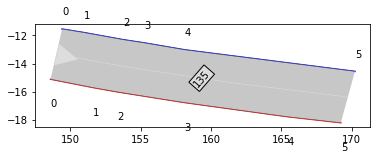

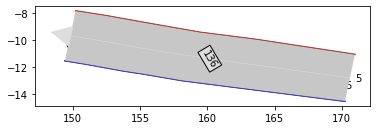

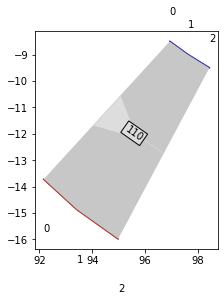

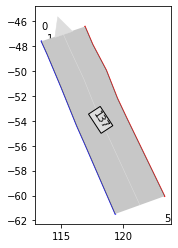

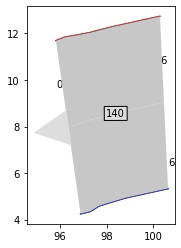

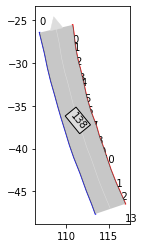

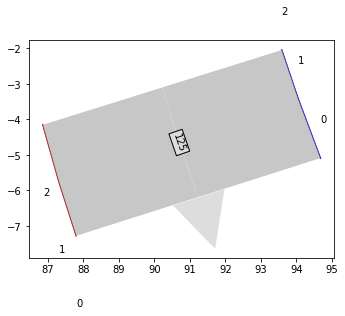

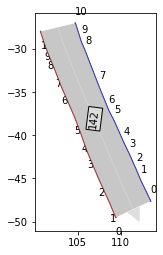

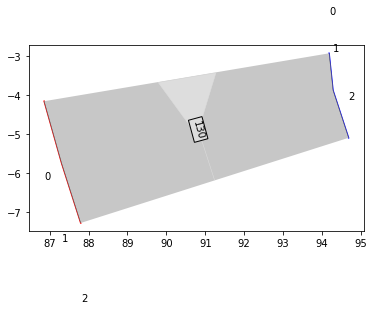

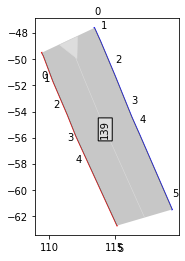

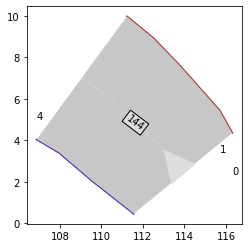

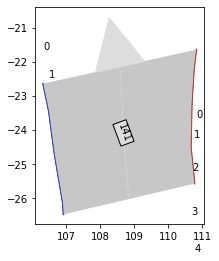

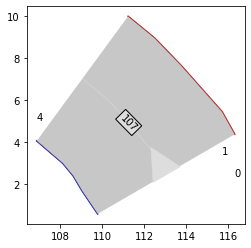

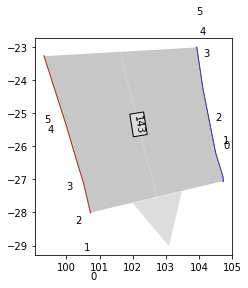

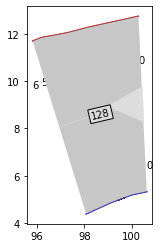

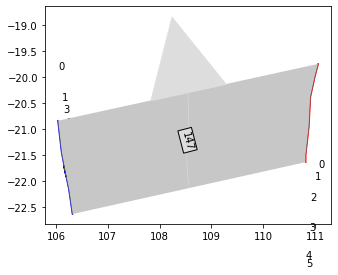

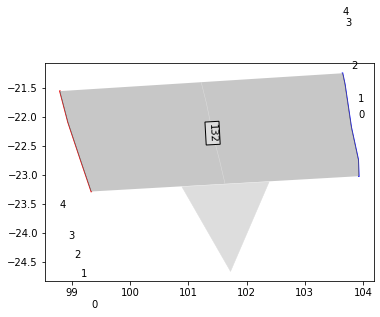

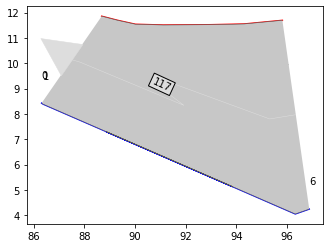

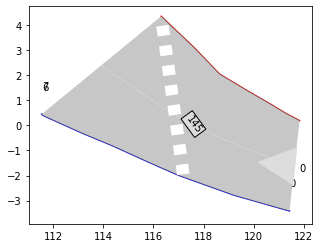

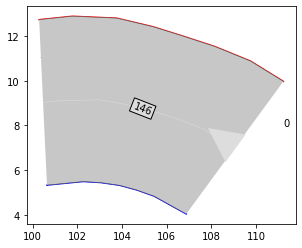

In [214]:
files = glob.glob("/data/dataset-converters_tum_cps/dataset-converters/src/INTERACTION/repaired_maps/translated/DEU_*.xml")
for file in files:
    print("="*100)
    print(file)
    scenario, pp_set = CommonRoadFileReader(file).open()
    for lanelet in scenario.lanelet_network.lanelets:
        plt.figure()
        draw_object(lanelet, draw_params={"lanelet": {"show_label": True}})
    #     draw_object(pp_set)
        lanelet_id = lanelet.lanelet_id
        curves = scenario.lanelet_network.find_lanelet_by_id(lanelet_id).left_vertices.T
        plt.plot(curves[0], curves[1], "blue")
        curves = scenario.lanelet_network.find_lanelet_by_id(lanelet_id).right_vertices.T
        plt.plot(curves[0], curves[1], "red")
        for i, waypoint in enumerate(scenario.lanelet_network.find_lanelet_by_id(lanelet_id).left_vertices):
            plt.text(waypoint[0], waypoint[1]+1, str(i))
        for i, waypoint in enumerate(scenario.lanelet_network.find_lanelet_by_id(lanelet_id).right_vertices):
            plt.text(waypoint[0], waypoint[1]-2, str(i))
        plt.gca().set_aspect("equal")
        plt.show()

### wrong lanelet ids:
#### DEU_Merging_MT_repaired | 102,106,110,103,107,111,108,104,112
#### DEU_Roundabout_OF_repaired | 104, 111, 114, 116, 106, 119, 118, 120, 121, 122, 124, 109, 123, 115, 112,134,126,136,137,140,138,125,142,141,143,147,132,117

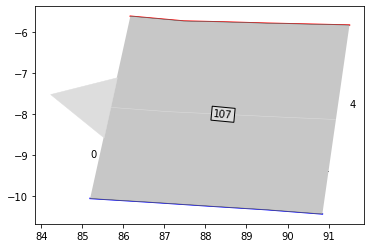

In [140]:
location = "USA_Intersection-2"
lanelet_id = 107
map_file = interaction_config["maps"][location]
x_offset_lanelets = interaction_config["offsets"][location]["x_offset_lanelets"]
y_offset_lanelets = interaction_config["offsets"][location]["y_offset_lanelets"]
file = f"/data/dataset-converters_tum_cps/dataset-converters/src/INTERACTION/repaired_maps/{map_file}.xml"
plt.figure()
scenario, pp_set = CommonRoadFileReader(file).open()
# scenario.lanelet_network.translate_rotate(np.array([-x_offset_lanelets, -y_offset_lanelets]), 0)
lanelet = scenario.lanelet_network.find_lanelet_by_id(lanelet_id)
lanelet.translate_rotate(np.array([-x_offset_lanelets, -y_offset_lanelets]), 0)
draw_object(lanelet, draw_params={"lanelet": {"show_label": True}})
draw_object(pp_set)
# lanelet_id = 169
curves = scenario.lanelet_network.find_lanelet_by_id(lanelet_id).left_vertices.T
plt.plot(curves[0], curves[1], "blue")
curves = scenario.lanelet_network.find_lanelet_by_id(lanelet_id).right_vertices.T
plt.plot(curves[0], curves[1], "red")
for i, waypoint in enumerate(scenario.lanelet_network.find_lanelet_by_id(lanelet_id).left_vertices):
    plt.text(waypoint[0], waypoint[1]+1, str(i))
for i, waypoint in enumerate(scenario.lanelet_network.find_lanelet_by_id(lanelet_id).right_vertices):
    plt.text(waypoint[0], waypoint[1]-2, str(i))
plt.gca().set_aspect("equal")
plt.show()

In [141]:
# file = "/data/dataset-converters_tum_cps/dataset-converters/src/INTERACTION/repaired_maps/CHN_Merging_ZS_repaired.xml"
scenario, pp_set = CommonRoadFileReader(file).open()
# lanelet_id = 146
correct_vertices = np.flip(scenario.lanelet_network.find_lanelet_by_id(lanelet_id).left_vertices, axis=0)
print(file)
print(lanelet_id)
print("    <leftBound>")
for v in correct_vertices:
    print("      <point>")
    print(f"        <x>{v[0]}</x>")
    print(f"        <y>{v[1]}</y>")
    print("      </point>")
print("    </leftBound>")
correct_vertices = np.flip(scenario.lanelet_network.find_lanelet_by_id(lanelet_id).right_vertices, axis=0)
print("    <rightBound>")
for v in correct_vertices:
    print("      <point>")
    print(f"        <x>{v[0]}</x>")
    print(f"        <y>{v[1]}</y>")
    print("      </point>")
print("    </rightBound>")

/data/dataset-converters_tum_cps/dataset-converters/src/INTERACTION/repaired_maps/USA_Intersection_EP1_repaired.xml
107
    <leftBound>
      <point>
        <x>-504599.15</x>
        <y>994.55858</y>
      </point>
      <point>
        <x>-504600.51</x>
        <y>994.6637</y>
      </point>
      <point>
        <x>-504601.95</x>
        <y>994.75472</y>
      </point>
      <point>
        <x>-504603.33</x>
        <y>994.84574</y>
      </point>
      <point>
        <x>-504604.81</x>
        <y>994.93657</y>
      </point>
    </leftBound>
    <rightBound>
      <point>
        <x>-504598.49</x>
        <y>999.16038</y>
      </point>
      <point>
        <x>-504600.51</x>
        <y>999.20606</y>
      </point>
      <point>
        <x>-504601.47</x>
        <y>999.23408</y>
      </point>
      <point>
        <x>-504602.53</x>
        <y>999.25898</y>
      </point>
      <point>
        <x>-504603.83</x>
        <y>999.37656</y>
      </point>
    </rightBound>


In [ ]:
# import necesary classes from different modules
from commonroad.common.file_writer import CommonRoadFileWriter
from commonroad.common.file_writer import OverwriteExistingFile
from commonroad.scenario.scenario import Location, Scenario
from commonroad.scenario.scenario import Tag

author = ''
affiliation = ''
source = 'OpenDRIVE 2 Lanelet Converter'
tags = {}

scenario_new = Scenario(dt=0.1, benchmark_id="ZAM_OpenDrive-123")
# write new scenario
fw = CommonRoadFileWriter(scenario_new, pp_set, author, affiliation, source, tags)

filename = "ZAM_Tutorial-1_2_T-1.xml"
fw.write_to_file(filename, OverwriteExistingFile.ALWAYS)